In [1]:
!pip install pyparsing==2.4.6

In [2]:
import sys
sys.path.append("../utils/") 
from utilities import performance_metrics
import time

from src.core import Term, Atom
from src.ilp import Language_Frame, Program_Template, Rule_Template
from src.dilp import DILP
import tensorflow as tf
import numpy as np
from src.utils import process_file, process_dir, output_rules, test_rule, create_table
from src.generate_template import create_templates
import duckdb


In [3]:
con = duckdb.connect(':memory:')
# enable automatic query parallelization
con.execute("PRAGMA threads=2")
# enable caching of parquet metadata
con.execute("PRAGMA enable_object_cache")

## Rule template
 Rule_Template(v: int, allow_intensional: bool): 
v is number of existentially qualified variables(X,Y,Z...) in the clause

Program_Template(p_a: list, rules: dict, T: int):
 p_a {list} -- set of auxiliary predicates; these are the additional invented predicates used to help define the target predicate
 
 
 rules {tuple} -- Map of intensional predicate to a pair if rule templates 
 T {int} -- Max number of steps of forward chaining inference

In [4]:
# p_a = [Atom([term_x_0], 'pred')]
# target_rule = (Rule_Template(v=0, allow_intensional=True), None)
# p_a_rule_1 = (Rule_Template(v=0, allow_intensional=False), None)

# rules = {p_a[0]: p_a_rule_1, target: target_rule} 

In [5]:
# arity 1
term_x_0 = Term(True, 'X_0')

## a, b learning

In [6]:
%%time 
input_dir = '../examples/a-b/'
target, p_e, constants, B, P, N = process_dir(input_dir)


p_a, rules = create_templates(p_e, target, term_x_0)

# target_rule = (Rule_Template(v=0, allow_intensional=False), None)
# rules = {target: target_rule} 


langage_frame = Language_Frame(target, p_e, constants)

program_template = Program_Template(p_a, rules, T=10)
print("DILP initialisation")
dilp = DILP(langage_frame, B, P, N, program_template)

186
end of facts processing
42
end of positive examples processing
102
end negative examples processing
data is in order
DILP initialisation
CPU times: user 38.1 ms, sys: 2.04 ms, total: 40.2 ms
Wall time: 39.8 ms


In [7]:
dilp.show_definition()

----------------------------
Target(X_0)
Target(X_0) -> B(X_0),B(X_0)
None
----------------------------


[(Target(X_0) -> B(X_0),B(X_0), None)]

In [8]:
program_template = Program_Template(p_a, rules, T=3)
print("DILP initialisation")
dilp = DILP(langage_frame, B, P, N, program_template)
start_time = time.time()
dilp.train()
finish_time = time.time()
print("execution time %d" % (finish_time - start_time))

DILP initialisation
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 0 loss is 0.8321481347084045
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Target(46) Expected: 0 0.873
Target(41) Expected: 0 0.873
Target(91) Expected: 1 1.000
Target(32) Expected: 0 0.159
Target(69) Expected: 0 0.159
Target(42) Expected: 1 1.000
Target(16) Expected: 0 0.873
Target(34) Expected: 0 0.873
Target(90) Expected: 1 1.000
Target(52) Expected: 0 0.873
Target(86) Expected: 1 1.000
Target(51) Expected: 0 0.873
Target(59) Expected: 0 0.159
Target(5) Expected: 0 0.873
Target(29) Expected: 1 1.000
Target(7) Expected: 0 0.873
Target(67) Expected: 0 0.159
Target(73) Expected: 1 1.000
Target(94) Expected: 0 0.159
Target(33) Expected

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 8 loss is 0.6099875569343567
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 9 loss is 0.5849892497062683
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 10 loss is 0.5607142448425293
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Target(46) Expected: 0 0.740
Target(41) Expected: 0 0.740
Target(91) Expecte

Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 24 loss is 0.29891857504844666
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 25 loss is 0.2854025661945343
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Target(46) Expected: 0 0.476
Target(41) Expected: 0 0.476
Target(91) Expected: 1 1.000
Target(32) Expected: 0 0.122
Target(69) Expected: 0 0.122
Target(42) Expected: 1 1.000
Target(16) Expected: 0 0.476
Target(34) Expected: 0 0.476
Target(90) Expected: 1 1.000
Target(52) Expected: 0 0.476
Target(86) Expected: 1 1.000
Target(51) Expected: 0 0.476
Target(59) Expected: 0

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 39 loss is 0.1492014229297638
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 40 loss is 0.14248234033584595
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Target(46) Expected: 0 0.263
Target(41) Expected: 0 0.263
Target(91) Expected: 1 1.000
Target(32) Expected: 0 0.081
Target(69) Expected: 0 0.081
Target(42) Expected: 1 1.000
Target(16) Expected: 0 0.263
Target(34) Expected: 0 0.263
Target(90) Expected: 1 1.000
Target(52) Expected: 0 0.263
Target(86) Expected: 1 1.000
Target(51) Expected: 0 0.263
Target(59) Expected: 0 0.081
Target(5) Expected: 0 0.263
Targe

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 55 loss is 0.07188136130571365
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Target(46) Expected: 0 0.137
Target(41) Expected: 0 0.137
Target(91) Expected: 1 1.000
Target(32) Expected: 0 0.048
Target(69) Expected: 0 0.048
Target(42) Expected: 1 1.000
Target(16) Expected: 0 0.137
Target(34) Expected: 0 0.137
Target(90) Expected: 1 1.000
Target(52) Expected: 0 0.137
Target(86) Expected: 1 1.000
Target(51) Expected: 0 0.137
Target(59) Expected: 0 0.048
Target(5) Expected: 0 0.137
Target(29) Expected: 1 1.000
Target(7) Expected: 0 0.137
Target(67) Expected: 0 0.048
Target(73) Expected: 1 1.000
Target(94) Expected: 0 0.048
Target(33) Expected: 0 0.137
Target(1) Expected: 0 0.048
Target(25) Expected: 1 1.000
Target(13) Expected: 0 0.137
Target(21) Expected: 0 0.137
Target(54) E

Inference Complete
Target(46) Expected: 0 0.071
Target(41) Expected: 0 0.071
Target(91) Expected: 1 1.000
Target(32) Expected: 0 0.027
Target(69) Expected: 0 0.027
Target(42) Expected: 1 1.000
Target(16) Expected: 0 0.071
Target(34) Expected: 0 0.071
Target(90) Expected: 1 1.000
Target(52) Expected: 0 0.071
Target(86) Expected: 1 1.000
Target(51) Expected: 0 0.071
Target(59) Expected: 0 0.027
Target(5) Expected: 0 0.071
Target(29) Expected: 1 1.000
Target(7) Expected: 0 0.071
Target(67) Expected: 0 0.027
Target(73) Expected: 1 1.000
Target(94) Expected: 0 0.027
Target(33) Expected: 0 0.071
Target(1) Expected: 0 0.027
Target(25) Expected: 1 1.000
Target(13) Expected: 0 0.071
Target(21) Expected: 0 0.071
Target(54) Expected: 0 0.071
Target(89) Expected: 0 0.071
Target(80) Expected: 1 1.000
Target(18) Expected: 0 0.027
Target(48) Expected: 0 0.027
Target(20) Expected: 0 0.071
Target(40) Expected: 1 1.000
Target(99) Expected: 0 0.027
Target(17) Expected: 0 0.071
Target(43) Expected: 0 0.02

Target(68) Expected: 0 0.015
Target(12) Expected: 0 0.015
Target(72) Expected: 0 0.015
Target(77) Expected: 1 1.000
Target(14) Expected: 0 0.036
Target(58) Expected: 0 0.015
Target(39) Expected: 0 0.036
Target(28) Expected: 0 0.015
Target(44) Expected: 1 1.000
Target(82) Expected: 1 1.000
Target(97) Expected: 0 0.015
Target(47) Expected: 0 0.036
Target(60) Expected: 0 0.036
Target(50) Expected: 0 0.015
Target(87) Expected: 0 0.015
Target(31) Expected: 1 1.000
Target(26) Expected: 1 1.000
----------------------------
Target(X_0)
Target(X_0) -> A(X_0),B(X_0)
None
----------------------------
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 86 loss is 0.018086303025484085
--------------------

Performing Inference
Progress: |███████████████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 101 loss is 0.009370747953653336
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 102 loss is 0.008970152586698532
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 103 loss is 0.00858678761869669
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 117 loss is 0.0046652439050376415
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 118 loss is 0.004466628190129995
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 119 loss is 0.0042765443213284016
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████████

Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 133 loss is 0.002328311325982213
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 134 loss is 0.0022294458467513323
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 135 loss is 0.002134863520041108
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Target(46) Expected: 0 0.004
Target(41) Expec

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 148 loss is 0.0012151978444308043
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 149 loss is 0.0011636796407401562
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 150 loss is 0.001114384736865759
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Target(46) Expected: 0 0.002
Target(41) Expected: 0 0.002
Targe

Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 164 loss is 0.0006078099831938744
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 165 loss is 0.0005820781225338578
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Target(46) Expected: 0 0.001
Target(41) Expected: 0 0.001
Target(91) Expected: 1 1.000
Target(32) Expected: 0 0.000
Target(69) Expected: 0 0.000
Target(42) Expected: 1 1.000
Target(16) Expected: 0 0.001
Target(34) Expected: 0 0.001
Target(90) Expected: 1 1.000
Target(52) Expected: 0 0.001
Target(86) Expected: 1 1.000
Target(51) Expected: 0 0.001
Target(59) Expe

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 179 loss is 0.0003176280006300658
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 180 loss is 0.00030418531969189644
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Target(46) Expected: 0 0.001
Target(41) Expected: 0 0.001
Target(91) Expected: 1 1.000
Target(32) Expected: 0 0.000
Target(69) Expected: 0 0.000
Target(42) Expected: 1 1.000
Target(16) Expected: 0 0.001
Target(34) Expected: 0 0.001
Target(90) Expected: 1 1.000
Target(52) Expected: 0 0.001
Target(86) Expected: 1 1.000
Target(51) Expected: 0 0.001
Target(59) Expected: 0 0.000
Target(5) Expected: 0 0.0

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 195 loss is 0.00015901587903499603
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Target(46) Expected: 0 0.000
Target(41) Expected: 0 0.000
Target(91) Expected: 1 1.000
Target(32) Expected: 0 0.000
Target(69) Expected: 0 0.000
Target(42) Expected: 1 1.000
Target(16) Expected: 0 0.000
Target(34) Expected: 0 0.000
Target(90) Expected: 1 1.000
Target(52) Expected: 0 0.000
Target(86) Expected: 1 1.000
Target(51) Expected: 0 0.000
Target(59) Expected: 0 0.000
Target(5) Expected: 0 0.000
Target(29) Expected: 1 1.000
Target(7) Expected: 0 0.000
Target(67) Expected: 0 0.000
Target(73) Expected: 1 1.000
Target(94) Expected: 0 0.000
Target(33) Expected: 0 0.000
Target(1) Expected: 0 0.000
Target(25) Expected: 1 1.000
Target(13) Expected: 0 0.000
Target(21) Expected: 0 0.000
Target(5

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Target(46) Expected: 0 0.000
Target(41) Expected: 0 0.000
Target(91) Expected: 1 1.000
Target(32) Expected: 0 0.000
Target(69) Expected: 0 0.000
Target(42) Expected: 1 1.000
Target(16) Expected: 0 0.000
Target(34) Expected: 0 0.000
Target(90) Expected: 1 1.000
Target(52) Expected: 0 0.000
Target(86) Expected: 1 1.000
Target(51) Expected: 0 0.000
Target(59) Expected: 0 0.000
Target(5) Expected: 0 0.000
Target(29) Expected: 1 1.000
Target(7) Expected: 0 0.000
Target(67) Expected: 0 0.000
Target(73) Expected: 1 1.000
Target(94) Expected: 0 0.000
Target(33) Expected: 0 0.000
Target(1) Expected: 0 0.000
Target(25) Expected: 1 1.000
Target(13) Expected: 0 0.000
Target(21) Expected: 0 0.000
Target(54) Expected: 0 0.000
Target(89) Expected: 0 0.000
Target(80) Expected: 1 1.000
Target(18) Expected: 0 0.000
Target(48) Expected: 0 0.000
Target(20) Expected: 0 0.000
Target(40) Expected: 1 1.000
Target

Target(14) Expected: 0 0.000
Target(58) Expected: 0 0.000
Target(39) Expected: 0 0.000
Target(28) Expected: 0 0.000
Target(44) Expected: 1 1.000
Target(82) Expected: 1 1.000
Target(97) Expected: 0 0.000
Target(47) Expected: 0 0.000
Target(60) Expected: 0 0.000
Target(50) Expected: 0 0.000
Target(87) Expected: 0 0.000
Target(31) Expected: 1 1.000
Target(26) Expected: 1 1.000
----------------------------
Target(X_0)
Target(X_0) -> A(X_0),B(X_0)
None
----------------------------
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 226 loss is 4.18637391703669e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 241 loss is 2.214351661677938e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 242 loss is 2.1234516680124216e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 243 loss is 2.037021840806119e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 257 loss is 1.1570858077902813e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 258 loss is 1.1116363566543441e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 259 loss is 1.0684222615964245e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 273 loss is 6.447267878684215e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 274 loss is 6.231198312889319e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 275 loss is 6.0498991842905525e-06
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Target(46) Expected: 0 0.000
Target(41) Expected: 0 0.000
Tar

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 289 loss is 3.966204076277791e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 290 loss is 3.879280484397896e-06
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Target(46) Expected: 0 0.000
Target(41) Expected: 0 0.000
Target(91) Expected: 1 1.000
Target(32) Expected: 0 0.000
Target(69) Expected: 0 0.000
Target(42) Expected: 1 1.000
Target(16) Expected: 0 0.000
Target(34) Expected: 0 0.000
Target(90) Expected: 1 1.000
Target(52) Expected: 0 0.000
Target(86) Expected: 1 1.000
Target(51) Expected: 0 0.000
Target(59) Expected: 0 0.000
Targe

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 305 loss is 2.7393352866056375e-06
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Target(46) Expected: 0 0.000
Target(41) Expected: 0 0.000
Target(91) Expected: 1 1.000
Target(32) Expected: 0 0.000
Target(69) Expected: 0 0.000
Target(42) Expected: 1 1.000
Target(16) Expected: 0 0.000
Target(34) Expected: 0 0.000
Target(90) Expected: 1 1.000
Target(52) Expected: 0 0.000
Target(86) Expected: 1 1.000
Target(51) Expected: 0 0.000
Target(59) Expected: 0 0.000
Target(5) Expected: 0 0.000
Target(29) Expected: 1 1.000
Target(7) Expected: 0 0.000
Target(67) Expected: 0 0.000
Target(73) Expected: 1 1.000
Target(94) Expected: 0 0.000
Target(33) Expected: 0 0.000
Target(1) Expected: 0 0.000
Target(25) Expected: 1 1.000
Target(13) Expected: 0 0.000
Target(21) Expected: 0 0.000
Target(5

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Target(46) Expected: 0 0.000
Target(41) Expected: 0 0.000
Target(91) Expected: 1 1.000
Target(32) Expected: 0 0.000
Target(69) Expected: 0 0.000
Target(42) Expected: 1 1.000
Target(16) Expected: 0 0.000
Target(34) Expected: 0 0.000
Target(90) Expected: 1 1.000
Target(52) Expected: 0 0.000
Target(86) Expected: 1 1.000
Target(51) Expected: 0 0.000
Target(59) Expected: 0 0.000
Target(5) Expected: 0 0.000
Target(29) Expected: 1 1.000
Target(7) Expected: 0 0.000
Target(67) Expected: 0 0.000
Target(73) Expected: 1 1.000
Target(94) Expected: 0 0.000
Target(33) Expected: 0 0.000
Target(1) Expected: 0 0.000
Target(25) Expected: 1 1.000
Target(13) Expected: 0 0.000
Target(21) Expected: 0 0.000
Target(54) Expected: 0 0.000
Target(89) Expected: 0 0.000
Target(80) Expected: 1 1.000
Target(18) Expected: 0 0.000
Target(48) Expected: 0 0.000
Target(20) Expected: 0 0.000
Target(40) Expected: 1 1.000
Target

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 336 loss is 1.6863165228642174e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 337 loss is 1.6440966419395409e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 338 loss is 1.6440966419395409e-06
--------------------

Performing Inference
Progress: |██████████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 351 loss is 1.4081610970606562e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 352 loss is 1.4205787692844751e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 353 loss is 1.4205787692844751e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 367 loss is 1.2144456604801235e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 368 loss is 1.194577293972543e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 369 loss is 1.1722255521817715e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 383 loss is 1.0430820793772e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 384 loss is 1.0430820793772e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 385 loss is 1.0232138265564572e-06
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Target(46) Expected: 0 0.000
Target(41) Expected: 0 0.000
Target(

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 399 loss is 9.362902346765622e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 400 loss is 9.164220386992383e-07
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Target(46) Expected: 0 0.000
Target(41) Expected: 0 0.000
Target(91) Expected: 1 1.000
Target(32) Expected: 0 0.000
Target(69) Expected: 0 0.000
Target(42) Expected: 1 1.000
Target(16) Expected: 0 0.000
Target(34) Expected: 0 0.000
Target(90) Expected: 1 1.000
Target(52) Expected: 0 0.000
Target(86) Expected: 1 1.000
Target(51) Expected: 0 0.000
Target(59) Expected: 0 0.000
Targe

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 415 loss is 8.294985036627622e-07
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Target(46) Expected: 0 0.000
Target(41) Expected: 0 0.000
Target(91) Expected: 1 1.000
Target(32) Expected: 0 0.000
Target(69) Expected: 0 0.000
Target(42) Expected: 1 1.000
Target(16) Expected: 0 0.000
Target(34) Expected: 0 0.000
Target(90) Expected: 1 1.000
Target(52) Expected: 0 0.000
Target(86) Expected: 1 1.000
Target(51) Expected: 0 0.000
Target(59) Expected: 0 0.000
Target(5) Expected: 0 0.000
Target(29) Expected: 1 1.000
Target(7) Expected: 0 0.000
Target(67) Expected: 0 0.000
Target(73) Expected: 1 1.000
Target(94) Expected: 0 0.000
Target(33) Expected: 0 0.000
Target(1) Expected: 0 0.000
Target(25) Expected: 1 1.000
Target(13) Expected: 0 0.000
Target(21) Expected: 0 0.000
Target(54

Target(34) Expected: 0 0.000
Target(90) Expected: 1 1.000
Target(52) Expected: 0 0.000
Target(86) Expected: 1 1.000
Target(51) Expected: 0 0.000
Target(59) Expected: 0 0.000
Target(5) Expected: 0 0.000
Target(29) Expected: 1 1.000
Target(7) Expected: 0 0.000
Target(67) Expected: 0 0.000
Target(73) Expected: 1 1.000
Target(94) Expected: 0 0.000
Target(33) Expected: 0 0.000
Target(1) Expected: 0 0.000
Target(25) Expected: 1 1.000
Target(13) Expected: 0 0.000
Target(21) Expected: 0 0.000
Target(54) Expected: 0 0.000
Target(89) Expected: 0 0.000
Target(80) Expected: 1 1.000
Target(18) Expected: 0 0.000
Target(48) Expected: 0 0.000
Target(20) Expected: 0 0.000
Target(40) Expected: 1 1.000
Target(99) Expected: 0 0.000
Target(17) Expected: 0 0.000
Target(43) Expected: 0 0.000
Target(98) Expected: 1 1.000
Target(30) Expected: 0 0.000
Target(83) Expected: 0 0.000
Target(36) Expected: 0 0.000
Target(62) Expected: 1 1.000
Target(92) Expected: 0 0.000
Target(57) Expected: 0 0.000
Target(4) Expecte

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 446 loss is 7.376078201559721e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 447 loss is 7.152560215217818e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 448 loss is 7.152560215217818e-07
--------------------

Performing Inference
Progress: |█████████████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 461 loss is 6.38266669739096e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 462 loss is 6.38266669739096e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 463 loss is 6.38266669739096e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████████

--------------------
step 476 loss is 5.960466751275817e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 477 loss is 5.960466751275817e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 478 loss is 5.960466751275817e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 479 loss is 5.

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 492 loss is 5.736949333368102e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 493 loss is 5.736949333368102e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 494 loss is 5.736949333368102e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

In [9]:
start_time = time.time()
dilp.train()
finish_time = time.time()
print("execution time %d" % (finish_time - start_time))

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 0 loss is 5.314749387252959e-07
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Target(46) Expected: 0 0.000
Target(41) Expected: 0 0.000
Target(91) Expected: 1 1.000
Target(32) Expected: 0 0.000
Target(69) Expected: 0 0.000
Target(42) Expected: 1 1.000
Target(16) Expected: 0 0.000
Target(34) Expected: 0 0.000
Target(90) Expected: 1 1.000
Target(52) Expected: 0 0.000
Target(86) Expected: 1 1.000
Target(51) Expected: 0 0.000
Target(59) Expected: 0 0.000
Target(5) Expected: 0 0.000
Target(29) Expected: 1 1.000
Target(7) Expected: 0 0.000
Target(67) Expected: 0 0.000
Target(73) Expected: 1 1.000
Target(94) Expected: 0 0.000
Target(33) Expected: 0 0.000
Target(

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 6 loss is 5.314749387252959e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 7 loss is 5.314749387252959e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 8 loss is 5.314749387252959e-07
--------------------

Performing Inference
Progress: |███████████████████████████████████

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 21 loss is 5.314749387252959e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 22 loss is 5.314749387252959e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 23 loss is 5.314749387252959e-07
--------------------

Performing Inference
Progress: |████████████████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 36 loss is 5.314749387252959e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 37 loss is 5.314749387252959e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 38 loss is 5.314749387252959e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 52 loss is 5.314749387252959e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 53 loss is 5.314749387252959e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 54 loss is 5.314749387252959e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████████

Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 68 loss is 5.314749387252959e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 69 loss is 5.314749387252959e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 70 loss is 5.314749387252959e-07
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Target(46) Expected: 0 0.000
Target(41) Expect

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 83 loss is 5.314749387252959e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 84 loss is 5.314749387252959e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 85 loss is 5.314749387252959e-07
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Target(46) Expected: 0 0.000
Target(41) Expected: 0 0.000
Target(91) Expected: 1 1.000

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 99 loss is 5.314749387252959e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 100 loss is 5.314749387252959e-07
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Target(46) Expected: 0 0.000
Target(41) Expected: 0 0.000
Target(91) Expected: 1 1.000
Target(32) Expected: 0 0.000
Target(69) Expected: 0 0.000
Target(42) Expected: 1 1.000
Target(16) Expected: 0 0.000
Target(34) Expected: 0 0.000
Target(90) Expected: 1 1.000
Target(52) Expected: 0 0.000
Target(86) Expected: 1 1.000
Target(51) Expected: 0 0.000
Target(59) Expected: 0 0.000
Target

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 115 loss is 5.314749387252959e-07
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Target(46) Expected: 0 0.000
Target(41) Expected: 0 0.000
Target(91) Expected: 1 1.000
Target(32) Expected: 0 0.000
Target(69) Expected: 0 0.000
Target(42) Expected: 1 1.000
Target(16) Expected: 0 0.000
Target(34) Expected: 0 0.000
Target(90) Expected: 1 1.000
Target(52) Expected: 0 0.000
Target(86) Expected: 1 1.000
Target(51) Expected: 0 0.000
Target(59) Expected: 0 0.000
Target(5) Expected: 0 0.000
Target(29) Expected: 1 1.000
Target(7) Expected: 0 0.000
Target(67) Expected: 0 0.000
Target(73) Expected: 1 1.000
Target(94) Expected: 0 0.000
Target(33) Expected: 0 0.000
Target(1) Expected: 0 0.000
Target(25) Expected: 1 1.000
Target(13) Expected: 0 0.000
Target(21) Expected: 0 0.000
Target(54

Target(59) Expected: 0 0.000
Target(5) Expected: 0 0.000
Target(29) Expected: 1 1.000
Target(7) Expected: 0 0.000
Target(67) Expected: 0 0.000
Target(73) Expected: 1 1.000
Target(94) Expected: 0 0.000
Target(33) Expected: 0 0.000
Target(1) Expected: 0 0.000
Target(25) Expected: 1 1.000
Target(13) Expected: 0 0.000
Target(21) Expected: 0 0.000
Target(54) Expected: 0 0.000
Target(89) Expected: 0 0.000
Target(80) Expected: 1 1.000
Target(18) Expected: 0 0.000
Target(48) Expected: 0 0.000
Target(20) Expected: 0 0.000
Target(40) Expected: 1 1.000
Target(99) Expected: 0 0.000
Target(17) Expected: 0 0.000
Target(43) Expected: 0 0.000
Target(98) Expected: 1 1.000
Target(30) Expected: 0 0.000
Target(83) Expected: 0 0.000
Target(36) Expected: 0 0.000
Target(62) Expected: 1 1.000
Target(92) Expected: 0 0.000
Target(57) Expected: 0 0.000
Target(4) Expected: 0 0.000
Target(6) Expected: 0 0.000
Target(81) Expected: 1 1.000
Target(8) Expected: 0 0.000
Target(3) Expected: 0 0.000
Target(15) Expected: 

Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 146 loss is 5.314749387252959e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 147 loss is 5.314749387252959e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 148 loss is 5.314749387252959e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference


Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 161 loss is 5.314749387252959e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 162 loss is 5.314749387252959e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 163 loss is 5.314749387252959e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 177 loss is 5.314749387252959e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 178 loss is 5.314749387252959e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 179 loss is 5.314749387252959e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 193 loss is 5.314749387252959e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 194 loss is 5.314749387252959e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 195 loss is 5.314749387252959e-07
Performing Inference
Progress: |██████████████████████████████████████████████████|

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 208 loss is 5.314749387252959e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 209 loss is 5.314749387252959e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 210 loss is 5.314749387252959e-07
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Target(46) Expected: 0 0.000
Target(41) Expected: 0 0.000
Targ

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 224 loss is 4.892549441137817e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 225 loss is 4.892549441137817e-07
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Target(46) Expected: 0 0.000
Target(41) Expected: 0 0.000
Target(91) Expected: 1 1.000
Target(32) Expected: 0 0.000
Target(69) Expected: 0 0.000
Target(42) Expected: 1 1.000
Target(16) Expected: 0 0.000
Target(34) Expected: 0 0.000
Target(90) Expected: 1 1.000
Target(52) Expected: 0 0.000
Target(86) Expected: 1 1.000
Target(51) Expected: 0 0.000
Target(59) Expected: 0 0.000
Targe

Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 240 loss is 4.6690325916642905e-07
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Target(46) Expected: 0 0.000
Target(41) Expected: 0 0.000
Target(91) Expected: 1 1.000
Target(32) Expected: 0 0.000
Target(69) Expected: 0 0.000
Target(42) Expected: 1 1.000
Target(16) Expected: 0 0.000
Target(34) Expected: 0 0.000
Target(90) Expected: 1 1.000
Target(52) Expected: 0 0.000
Target(86) Expected: 1 1.000
Target(51) Expected: 0 0.000
Target(59) Expected: 0 0.000
Target(5) Expected: 0 0.000
Target(29) Expected: 1 1.000
Target(7) Expected: 0 0.000
Target(67) Expected: 0 0.000
Target(73) Expected: 1 1.000
Target(94) Expected: 0 0.000
Target(33) Expected: 0 0.000
Target(1) Expected: 0 0.000
Target(25) Expected: 1 1.000
Target(13) Expected: 0 0.000
Target(21) Expecte

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 255 loss is 4.470349495022674e-07
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Target(46) Expected: 0 0.000
Target(41) Expected: 0 0.000
Target(91) Expected: 1 1.000
Target(32) Expected: 0 0.000
Target(69) Expected: 0 0.000
Target(42) Expected: 1 1.000
Target(16) Expected: 0 0.000
Target(34) Expected: 0 0.000
Target(90) Expected: 1 1.000
Target(52) Expected: 0 0.000
Target(86) Expected: 1 1.000
Target(51) Expected: 0 0.000
Target(59) Expected: 0 0.000
Target(5) Expected: 0 0.000
Target(29) Expected: 1 1.000
Target(7) Expected: 0 0.000
Target(67) Expected: 0 0.000
Target(73) Expected: 1 1.000
Target(94) Expected: 0 0.000
Target(33) Expected: 0 0.000
Target(1) Expected: 0 0.000
Target(25) Expected: 1 1.000
Target(13) Expected: 0 0.000
Target(21) Expected: 0 0.000
Target(54

Target(13) Expected: 0 0.000
Target(21) Expected: 0 0.000
Target(54) Expected: 0 0.000
Target(89) Expected: 0 0.000
Target(80) Expected: 1 1.000
Target(18) Expected: 0 0.000
Target(48) Expected: 0 0.000
Target(20) Expected: 0 0.000
Target(40) Expected: 1 1.000
Target(99) Expected: 0 0.000
Target(17) Expected: 0 0.000
Target(43) Expected: 0 0.000
Target(98) Expected: 1 1.000
Target(30) Expected: 0 0.000
Target(83) Expected: 0 0.000
Target(36) Expected: 0 0.000
Target(62) Expected: 1 1.000
Target(92) Expected: 0 0.000
Target(57) Expected: 0 0.000
Target(4) Expected: 0 0.000
Target(6) Expected: 0 0.000
Target(81) Expected: 1 1.000
Target(8) Expected: 0 0.000
Target(3) Expected: 0 0.000
Target(15) Expected: 0 0.000
Target(53) Expected: 1 1.000
Target(88) Expected: 1 1.000
Target(2) Expected: 0 0.000
Target(70) Expected: 1 1.000
Target(65) Expected: 1 1.000
Target(37) Expected: 0 0.000
Target(74) Expected: 0 0.000
Target(61) Expected: 0 0.000
Target(68) Expected: 0 0.000
Target(12) Expected

Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 286 loss is 4.246832077114959e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 287 loss is 4.0233146592072444e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 288 loss is 4.0233146592072444e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inferenc

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 301 loss is 3.824632415216911e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 302 loss is 3.824632415216911e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 303 loss is 3.824632415216911e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 317 loss is 3.824632415216911e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 318 loss is 3.824632415216911e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 319 loss is 3.824632415216911e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 333 loss is 3.601114997309196e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 334 loss is 3.601114997309196e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 335 loss is 3.601114997309196e-07
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Target(46) Expected: 0 0.000
Target(41) Expected: 0 0.000
Targ

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 349 loss is 3.4024327533188625e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 350 loss is 3.4024327533188625e-07
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Target(46) Expected: 0 0.000
Target(41) Expected: 0 0.000
Target(91) Expected: 1 1.000
Target(32) Expected: 0 0.000
Target(69) Expected: 0 0.000
Target(42) Expected: 1 1.000
Target(16) Expected: 0 0.000
Target(34) Expected: 0 0.000
Target(90) Expected: 1 1.000
Target(52) Expected: 0 0.000
Target(86) Expected: 1 1.000
Target(51) Expected: 0 0.000
Target(59) Expected: 0 0.000
Tar

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 365 loss is 3.1789150511940534e-07
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Target(46) Expected: 0 0.000
Target(41) Expected: 0 0.000
Target(91) Expected: 1 1.000
Target(32) Expected: 0 0.000
Target(69) Expected: 0 0.000
Target(42) Expected: 1 1.000
Target(16) Expected: 0 0.000
Target(34) Expected: 0 0.000
Target(90) Expected: 1 1.000
Target(52) Expected: 0 0.000
Target(86) Expected: 1 1.000
Target(51) Expected: 0 0.000
Target(59) Expected: 0 0.000
Target(5) Expected: 0 0.000
Target(29) Expected: 1 1.000
Target(7) Expected: 0 0.000
Target(67) Expected: 0 0.000
Target(73) Expected: 1 1.000
Target(94) Expected: 0 0.000
Target(33) Expected: 0 0.000
Target(1) Expected: 0 0.000
Target(25) Expected: 1 1.000
Target(13) Expected: 0 0.000
Target(21) Expected: 0 0.000
Target(5

Target(99) Expected: 0 0.000
Target(17) Expected: 0 0.000
Target(43) Expected: 0 0.000
Target(98) Expected: 1 1.000
Target(30) Expected: 0 0.000
Target(83) Expected: 0 0.000
Target(36) Expected: 0 0.000
Target(62) Expected: 1 1.000
Target(92) Expected: 0 0.000
Target(57) Expected: 0 0.000
Target(4) Expected: 0 0.000
Target(6) Expected: 0 0.000
Target(81) Expected: 1 1.000
Target(8) Expected: 0 0.000
Target(3) Expected: 0 0.000
Target(15) Expected: 0 0.000
Target(53) Expected: 1 1.000
Target(88) Expected: 1 1.000
Target(2) Expected: 0 0.000
Target(70) Expected: 1 1.000
Target(65) Expected: 1 1.000
Target(37) Expected: 0 0.000
Target(74) Expected: 0 0.000
Target(61) Expected: 0 0.000
Target(68) Expected: 0 0.000
Target(12) Expected: 0 0.000
Target(72) Expected: 0 0.000
Target(77) Expected: 1 1.000
Target(14) Expected: 0 0.000
Target(58) Expected: 0 0.000
Target(39) Expected: 0 0.000
Target(28) Expected: 0 0.000
Target(44) Expected: 1 1.000
Target(82) Expected: 1 1.000
Target(97) Expected

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 396 loss is 3.1789150511940534e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 397 loss is 3.1789150511940534e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 398 loss is 3.1789150511940534e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 412 loss is 2.756715389296005e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 413 loss is 2.756715389296005e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 414 loss is 2.756715389296005e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 428 loss is 2.756715389296005e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 429 loss is 2.756715389296005e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 430 loss is 2.756715389296005e-07
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Target(46) Expected: 0 0.000
Target(41) Exp

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 443 loss is 2.756715389296005e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 444 loss is 2.756715389296005e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 445 loss is 2.756715389296005e-07
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Target(46) Expected: 0 0.000
Target(41) Expected: 0 0.000
Target(91) Expected: 1 1.

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 459 loss is 2.756715389296005e-07
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 460 loss is 2.756715389296005e-07
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Target(46) Expected: 0 0.000
Target(41) Expected: 0 0.000
Target(91) Expected: 1 1.000
Target(32) Expected: 0 0.000
Target(69) Expected: 0 0.000
Target(42) Expected: 1 1.000
Target(16) Expected: 0 0.000
Target(34) Expected: 0 0.000
Target(90) Expected: 1 1.000
Target(52) Expected: 0 0.000
Target(86) Expected: 1 1.000
Target(51) Expected: 0 0.000
Target(59) Expected: 0 0.000
Targe

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 475 loss is 2.756715389296005e-07
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Target(46) Expected: 0 0.000
Target(41) Expected: 0 0.000
Target(91) Expected: 1 1.000
Target(32) Expected: 0 0.000
Target(69) Expected: 0 0.000
Target(42) Expected: 1 1.000
Target(16) Expected: 0 0.000
Target(34) Expected: 0 0.000
Target(90) Expected: 1 1.000
Target(52) Expected: 0 0.000
Target(86) Expected: 1 1.000
Target(51) Expected: 0 0.000
Target(59) Expected: 0 0.000
Target(5) Expected: 0 0.000
Target(29) Expected: 1 1.000
Target(7) Expected: 0 0.000
Target(67) Expected: 0 0.000
Target(73) Expected: 1 1.000
Target(94) Expected: 0 0.000
Target(33) Expected: 0 0.000
Target(1) Expected: 0 0.000
Target(25) Expected: 1 1.000
Target(13) Expected: 0 0.000
Target(21) Expected: 0 0.000
Target(54

Target(46) Expected: 0 0.000
Target(41) Expected: 0 0.000
Target(91) Expected: 1 1.000
Target(32) Expected: 0 0.000
Target(69) Expected: 0 0.000
Target(42) Expected: 1 1.000
Target(16) Expected: 0 0.000
Target(34) Expected: 0 0.000
Target(90) Expected: 1 1.000
Target(52) Expected: 0 0.000
Target(86) Expected: 1 1.000
Target(51) Expected: 0 0.000
Target(59) Expected: 0 0.000
Target(5) Expected: 0 0.000
Target(29) Expected: 1 1.000
Target(7) Expected: 0 0.000
Target(67) Expected: 0 0.000
Target(73) Expected: 1 1.000
Target(94) Expected: 0 0.000
Target(33) Expected: 0 0.000
Target(1) Expected: 0 0.000
Target(25) Expected: 1 1.000
Target(13) Expected: 0 0.000
Target(21) Expected: 0 0.000
Target(54) Expected: 0 0.000
Target(89) Expected: 0 0.000
Target(80) Expected: 1 1.000
Target(18) Expected: 0 0.000
Target(48) Expected: 0 0.000
Target(20) Expected: 0 0.000
Target(40) Expected: 1 1.000
Target(99) Expected: 0 0.000
Target(17) Expected: 0 0.000
Target(43) Expected: 0 0.000
Target(98) Expect

In [10]:
ab_rules = dilp.show_definition()
sql_str = output_rules(ab_rules)

----------------------------
Target(X_0)
Target(X_0) -> A(X_0),B(X_0)
None
----------------------------
Target : A B


Accuracy: 1.000000
Precision TP/(TP+FP): 1.000000
Recall TP/(TP+FN): 1.000000
F1 Score: 1.000000
MCC Score: 1.000000


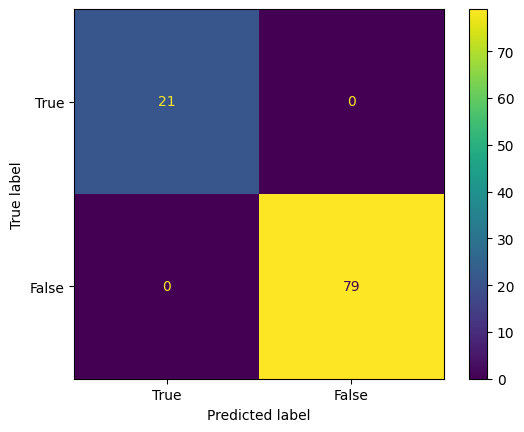

In [11]:
input_table = create_table(con, input_dir)
predicted_table = test_rule(con, sql_str, target_predicate="Target")
performance_metrics(predicted_table["Target"],input_table["Target"], labels=[True,False])

## a, b, c learning

In [12]:
%%time 
input_dir = '../examples/a-b-c/'
target, p_e, constants, B, P, N = process_dir(input_dir)
p_a, rules = create_templates(p_e, target, term_x_0)

300
end of facts processing
26
end of positive examples processing
148
end negative examples processing
data is in order
CPU times: user 52.8 ms, sys: 1.13 ms, total: 54 ms
Wall time: 18.8 ms


In [13]:


langage_frame = Language_Frame(target, p_e, constants)
program_template = Program_Template(p_a, rules, T=10)
print("DILP initialisation")
dilp = DILP(langage_frame, B, P, N, program_template)

DILP initialisation


In [14]:
start_time = time.time()
dilp.train()
finish_time = time.time()
print("execution time %d" % (finish_time - start_time))

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 0 loss is 5.114994049072266
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Target(78) Expected: 0 0.347
Target(34) Expected: 0 1.000
Target(90) Expected: 0 1.000
Target(29) Expected: 0 1.000
Target(67) Expected: 0 0.226
Target(25) Expected: 1 1.000
Target(84) Expected: 0 0.347
Target(76) Expected: 0 0.347
Target(99) Expected: 0 0.226
Target(17) Expected: 0 1.000
Target(43) Expected: 0 1.000
Target(23) Expected: 0 0.347
Target(30) Expected: 0 1.000
Target(57) Expected: 0 1.000
Target(6) Expected: 0 1.000
Target(2) Expected: 0 1.000
Target(24) Expected: 0 0.347
Target(61) Expected: 0 1.000
Target(14) Expected: 0 1.000
Target(27) Expected: 0 0.347
Target(82) 

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 8 loss is 4.3137383460998535
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 9 loss is 4.229767799377441
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 10 loss is 4.14858865737915
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete


Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 16 loss is 3.6676063537597656
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 17 loss is 3.583446979522705
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 18 loss is 3.4978644847869873
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 26 loss is 2.7097909450531006
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 27 loss is 2.5997507572174072
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 28 loss is 2.4887611865997314
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 36 loss is 1.6589702367782593
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 37 loss is 1.5710159540176392
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 38 loss is 1.4873220920562744
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████████████████

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 46 loss is 0.9586918950080872
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 47 loss is 0.9078863859176636
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 48 loss is 0.8599205613136292
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████████████████████████████████████████

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 56 loss is 0.5611251592636108
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 57 loss is 0.5325073003768921
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 58 loss is 0.5054693222045898
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████████████████████████████████████████

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 67 loss is 0.3196505606174469
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 68 loss is 0.3041340708732605
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 69 loss is 0.2894343435764313
--------------------

Performing Inference
Progress: |█████████████████████████████████████████

----------------------------
Target(X_0)
Target(X_0) -> pred1(X_0),B(X_0)
None
----------------------------
----------------------------
pred1(X_0)
pred1(X_0) -> A(X_0),C(X_0)
None
----------------------------
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 76 loss is 0.20579831302165985
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 77 loss is 0.19616153836250305
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Infe

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 86 loss is 0.12832200527191162
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 87 loss is 0.12249850481748581
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 88 loss is 0.11695379763841629
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 96 loss is 0.08106080442667007
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 97 loss is 0.07746418565511703
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 98 loss is 0.0740334764122963
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████████████████████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 107 loss is 0.04941108822822571
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 108 loss is 0.0472555011510849
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 109 loss is 0.04519644007086754
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████████████

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 117 loss is 0.03170120716094971
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 118 loss is 0.030332272872328758
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 119 loss is 0.029023507609963417
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████████████████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 126 loss is 0.021333422511816025
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 127 loss is 0.020417947322130203
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 128 loss is 0.019542235881090164
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████████

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 137 loss is 0.013184535317122936
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 138 loss is 0.012621637433767319
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 139 loss is 0.012082969769835472
--------------------

Performing Inference
Progress: |████████████████████████████████

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 148 loss is 0.008165157400071621
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 149 loss is 0.007817677222192287
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 150 loss is 0.00748506560921669
Performing Inference
Progress: |██████████████████████████████████████████████████| 100

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 156 loss is 0.005767507012933493
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 157 loss is 0.005522457417100668
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 158 loss is 0.005287862848490477
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████████████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 167 loss is 0.0035787378437817097
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 168 loss is 0.0034269108437001705
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 169 loss is 0.003281544428318739
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████████

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 176 loss is 0.0024229998234659433
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 177 loss is 0.0023202840238809586
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 178 loss is 0.0022219389211386442
--------------------

Performing Inference
Progress: |█████████████████████████████

Inference Complete
--------------------
step 186 loss is 0.00157144945114851
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 187 loss is 0.0015048772329464555
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 188 loss is 0.001441131578758359
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
ste

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 198 loss is 0.0009349499014206231
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 199 loss is 0.0008953831274993718
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 200 loss is 0.0008574542007409036
Performing Inference
Progress: |██████████████████████████████████████████████████|

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 206 loss is 0.0006614865851588547
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 207 loss is 0.0006334983627311885
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 208 loss is 0.0006067061331123114
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████████████████████████████

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 217 loss is 0.00041122589027509093
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 218 loss is 0.00039384569390676916
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 219 loss is 0.00037720942054875195
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 226 loss is 0.00027890517958439887
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 227 loss is 0.0002671389083843678
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 228 loss is 0.00025586504489183426
--------------------

Performing Inference
Progress: |███████████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 236 loss is 0.00018140222528018057
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 237 loss is 0.00017378627671860158
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 238 loss is 0.000166501515195705
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 247 loss is 0.00011341235222062096
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 248 loss is 0.00010870311234612018
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 249 loss is 0.00010420431499369442
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 256 loss is 7.764066685922444e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 257 loss is 7.448246469721198e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 258 loss is 7.142706454033032e-05
--------------------

Performing Inference
Progress: |█████████████████████████████

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 267 loss is 4.9442362069385126e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 268 loss is 4.748342325910926e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 269 loss is 4.562520916806534e-05
--------------------

Performing Inference
Progress: |████████████████████████████

Inference Complete
--------------------
step 277 loss is 3.3402448025299236e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 278 loss is 3.2152711355593055e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 279 loss is 3.0966020858613774e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 286 loss is 2.394457987975329e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 287 loss is 2.3102535124053247e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 288 loss is 2.230639620393049e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 297 loss is 1.6482703358633444e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 298 loss is 1.5982554032234475e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 299 loss is 1.5481033187825233e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 306 loss is 1.2515783055278007e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 307 loss is 1.2152665476605762e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 308 loss is 1.1816265214292798e-05
--------------------

Performing Inference
Progress: |██████████████████████████

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 316 loss is 9.54027291300008e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 317 loss is 9.302534635935444e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 318 loss is 9.081924872589298e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 327 loss is 7.404741609207122e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 328 loss is 7.2259244916494936e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 329 loss is 7.06971695763059e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████████████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 336 loss is 6.168098025227664e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 337 loss is 6.0577935983019415e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 338 loss is 5.954339940217324e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 347 loss is 5.1205493036832195e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 348 loss is 5.042445991421118e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 349 loss is 4.945159162161872e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 356 loss is 4.468317001737887e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 357 loss is 4.403916136652697e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 358 loss is 4.332664047979051e-06
--------------------

Performing Inference
Progress: |█████████████████████████████

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 367 loss is 3.86130250262795e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 368 loss is 3.822251073870575e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 369 loss is 3.776348194151069e-06
--------------------

Performing Inference
Progress: |██████████████████████████████

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 378 loss is 3.410495992284268e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 379 loss is 3.3700739550113212e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 380 loss is 3.3310222988802707e-06
Performing Inference
Progress: |█████████████████████████████████████████████████

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 386 loss is 3.127542868242017e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 387 loss is 3.105619271082105e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 388 loss is 3.08026983475429e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 397 loss is 2.829517598001985e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 398 loss is 2.8041683890478453e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 399 loss is 2.7788191800937057e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 408 loss is 2.5671183720987756e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 409 loss is 2.55341615229554e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 410 loss is 2.5280669433414005e-06
Performing Inference
Progress: |██████████████████████████████████████████████████

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 416 loss is 2.409541821180028e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 417 loss is 2.4013204438233515e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 418 loss is 2.375971234869212e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 427 loss is 2.2478548089566175e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 428 loss is 2.227986442449037e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 429 loss is 2.2074327716836706e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 438 loss is 2.069724814646179e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 439 loss is 2.0457459868339356e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 440 loss is 2.0320437670307e-06
Performing Inference
Progress: |██████████████████████████████████████████████████| 

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 446 loss is 1.959421751962509e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 447 loss is 1.9512003746058326e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 448 loss is 1.945719304785598e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 457 loss is 1.8326755935049732e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 458 loss is 1.8271946373715764e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 459 loss is 1.8189733737017377e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 466 loss is 1.7395001350450912e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 467 loss is 1.7395001350450912e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 468 loss is 1.7141510397777893e-06
--------------------

Performing Inference
Progress: |██████████████████████████

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 477 loss is 1.6531756727999891e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 478 loss is 1.6264563100776286e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 479 loss is 1.6209754676310695e-06
--------------------

Performing Inference
Progress: |██████████████████████████

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 488 loss is 1.548353566249716e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 489 loss is 1.548353566249716e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 490 loss is 1.5401321888930397e-06
Performing Inference
Progress: |██████████████████████████████████████████████████

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 496 loss is 1.5010805327619892e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 497 loss is 1.4887485804138123e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 498 loss is 1.480527203057136e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████████████████████████

In [15]:
abc_rules = dilp.show_definition()
sql_str = output_rules(abc_rules)

----------------------------
Target(X_0)
Target(X_0) -> pred1(X_0),B(X_0)
None
----------------------------
----------------------------
pred1(X_0)
pred1(X_0) -> A(X_0),C(X_0)
None
----------------------------
pred1 : A C
Target : pred1 B


In [16]:
abc_rules
pred = abc_rules[0][0].head
shape = dilp.rule_weights[pred].shape
rule_weights = tf.reshape(dilp.rule_weights[pred], [-1])
weights = tf.reshape(tf.nn.softmax(rule_weights)[:, None], shape)
dilp.rule_weights[pred]
dilp.rules_softmax()

{Target(X_0): <tf.Tensor: shape=(4, 1), dtype=float32, numpy=
 array([[1.9199398e-07],
        [1.6160361e-07],
        [1.9205038e-07],
        [9.9999940e-01]], dtype=float32)>,
 pred1(X_0): <tf.Tensor: shape=(6, 1), dtype=float32, numpy=
 array([[2.3095108e-08],
        [4.3490065e-08],
        [9.9999988e-01],
        [1.2334082e-08],
        [1.9090653e-08],
        [1.3962492e-08]], dtype=float32)>}

previous table dropped
Accuracy: 1.000000
Precision TP/(TP+FP): 1.000000
Recall TP/(TP+FN): 1.000000
F1 Score: 1.000000
MCC Score: 1.000000


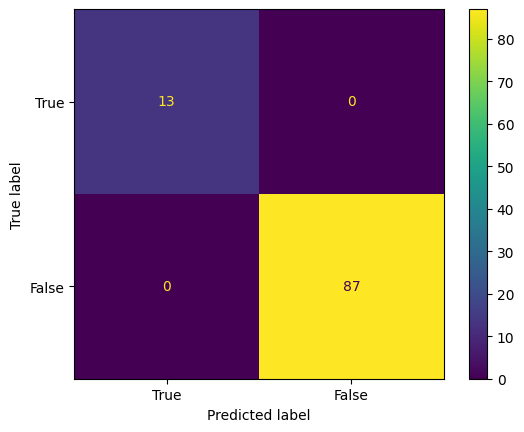

In [17]:
input_table = create_table(con, input_dir)
predicted_table = test_rule(con, sql_str, target_predicate="Target")
performance_metrics(predicted_table["Target"],input_table["Target"], labels=[True,False])

## a, b, c, d learning

In [18]:
%%time 
input_dir = '../examples/a-b-c-d/'
target, p_e, constants, B, P, N = process_dir(input_dir)
target, p_e, constants, B, P, N = process_dir(input_dir)
p_a, rules = create_templates(p_e, target, term_x_0)

# p_a = [Atom([term_x_0], 'pred'), Atom([term_x_0], 'pred2')]
# target_rule = (Rule_Template(v=0, allow_intensional=True),None)
# p_a_rule_1 = (Rule_Template(v=0, allow_intensional=True), None)
# p_a_rule_2 = (Rule_Template(v=0, allow_intensional=False), None)

# rules = {p_a[0]: p_a_rule_1, p_a[1]: p_a_rule_2, target: target_rule} 

langage_frame = Language_Frame(target, p_e, constants)
program_template = Program_Template(p_a, rules, T=10)
print("DILP initialisation")
dilp = DILP(langage_frame, B, P, N, program_template)
start_time = time.time()
dilp.train()
finish_time = time.time()
print("execution time %d" % (finish_time - start_time))

436
end of facts processing
22
end of positive examples processing
168
end negative examples processing
data is in order
436
end of facts processing
22
end of positive examples processing
168
end negative examples processing
data is in order
DILP initialisation
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 0 loss is 4.921651840209961
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Target(78) Expected: 0 1.000
Target(34) Expected: 0 1.000
Target(90) Expected: 0 1.000
Target(35) Expected: 0 0.293
Target(29) Expected: 0 1.000
Target(67) Expected: 0 0.946
Target(25) Expected: 0 0.530
Target(45) Expected: 0 0.997
Target(84) Expected: 1 1.000
Target(76) Expected: 0 1.000
Target(99) Expected: 0 1.000
Target(1

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 6 loss is 4.70197868347168
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 7 loss is 4.660459995269775
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 8 loss is 4.615588188171387
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 16 loss is 4.183279037475586
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 17 loss is 4.118289470672607
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 18 loss is 4.050209999084473
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 26 loss is 3.413766384124756
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 27 loss is 3.3238768577575684
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 28 loss is 3.232212543487549
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 36 loss is 2.4665722846984863
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 37 loss is 2.370940923690796
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 38 loss is 2.2763419151306152
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 46 loss is 1.5880773067474365
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 47 loss is 1.5134903192520142
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 48 loss is 1.4417973756790161
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 56 loss is 0.9699658155441284
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 57 loss is 0.9226744174957275
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 58 loss is 0.8776642084121704
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 66 loss is 0.5880090594291687
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 67 loss is 0.5593000054359436
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 68 loss is 0.5320057272911072
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 76 loss is 0.3573363125324249
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 77 loss is 0.34014958143234253
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 78 loss is 0.3238324522972107
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 86 loss is 0.2197025865316391
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 87 loss is 0.20944757759571075
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 88 loss is 0.1997017115354538
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 96 loss is 0.13711610436439514
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 97 loss is 0.1308993250131607
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 98 loss is 0.12497959285974503
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 106 loss is 0.08664795011281967
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 107 loss is 0.08280619978904724
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 108 loss is 0.0791415348649025
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 116 loss is 0.05524805560708046
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 117 loss is 0.05283664911985397
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 118 loss is 0.050533395260572433
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 126 loss is 0.03544152155518532
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 127 loss is 0.03391095623373985
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 128 loss is 0.03244771063327789
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 136 loss is 0.022827250882983208
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 137 loss is 0.021848339587450027
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 138 loss is 0.0209119264036417
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 146 loss is 0.014741366729140282
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 147 loss is 0.014112122356891632
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 148 loss is 0.013509964570403099
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 156 loss is 0.00953602697700262
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 157 loss is 0.009130207821726799
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 158 loss is 0.008741750381886959
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 166 loss is 0.00617568101733923
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 167 loss is 0.0059133851900696754
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 168 loss is 0.0056622750125825405
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 176 loss is 0.004002440255135298
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 177 loss is 0.0038326727226376534
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 178 loss is 0.003670142265036702
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 186 loss is 0.002595318714156747
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 187 loss is 0.002485350938513875
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 188 loss is 0.0023800560738891363
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 196 loss is 0.00168360595125705
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 197 loss is 0.0016123369568958879
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 198 loss is 0.0015440963907167315
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 206 loss is 0.0010927212424576283
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 207 loss is 0.001046515884809196
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 208 loss is 0.001002283999696374
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 216 loss is 0.0007097669877111912
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 217 loss is 0.00067983876215294
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 218 loss is 0.0006511839455924928
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 226 loss is 0.0004617831145878881
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 227 loss is 0.00044242508010938764
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 228 loss is 0.0004238824767526239
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 236 loss is 0.00030146344215609133
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 237 loss is 0.0002889610768761486
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 238 loss is 0.00027699736529029906
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 246 loss is 0.00019813519611489028
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 247 loss is 0.00019009866809938103
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 248 loss is 0.0001824038045015186
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 256 loss is 0.00013174708874430507
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 257 loss is 0.00012658823106903583
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 258 loss is 0.00012165915541118011
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 266 loss is 8.911475742934272e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 267 loss is 8.579730638302863e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 268 loss is 8.261669427156448e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 276 loss is 6.156200106488541e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 277 loss is 5.939636321272701e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 278 loss is 5.7321110944030806e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 286 loss is 4.349813752924092e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 287 loss is 4.2069939809152856e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 288 loss is 4.070323848281987e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 296 loss is 3.145843220409006e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 297 loss is 3.0495875762426294e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 298 loss is 2.9574113796115853e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 306 loss is 2.3303799025597982e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 307 loss is 2.264998147438746e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 308 loss is 2.2016245566192083e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 316 loss is 1.7734475477482192e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 317 loss is 1.7280824977206066e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 318 loss is 1.684725793893449e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 326 loss is 1.3895739357394632e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 327 loss is 1.3582643987319898e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 328 loss is 1.3278961887408514e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 336 loss is 1.1229732081119437e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 337 loss is 1.0995069715136196e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 338 loss is 1.079177854990121e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 346 loss is 9.336750736110844e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 347 loss is 9.159184628515504e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 348 loss is 9.007345397549216e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 356 loss is 7.933804226922803e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 357 loss is 7.818983249308076e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 358 loss is 7.705418283876497e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 366 loss is 6.894774742249865e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 367 loss is 6.808816578995902e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 368 loss is 6.719721568515524e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 376 loss is 6.092289368098136e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 377 loss is 6.018880412739236e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 378 loss is 5.955509550403804e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 386 loss is 5.458585746964673e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 387 loss is 5.398352641350357e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 388 loss is 5.337491984391818e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 396 loss is 4.935309789289022e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 397 loss is 4.890762284048833e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 398 loss is 4.837430878978921e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 406 loss is 4.505521701503312e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 407 loss is 4.463484401640017e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 408 loss is 4.426465693541104e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 416 loss is 4.141613771935226e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 417 loss is 4.112752321816515e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 418 loss is 4.075106971868081e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 426 loss is 3.837939402728807e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 427 loss is 3.8191169551282655e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 428 loss is 3.7946467728033895e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 436 loss is 3.5725386169360718e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 437 loss is 3.5474420201353496e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 438 loss is 3.5261091397842392e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 446 loss is 3.3391361284884624e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 447 loss is 3.3178034755110275e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 448 loss is 3.2945890779956244e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 456 loss is 3.153417992507457e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 457 loss is 3.1289487196772825e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 458 loss is 3.1132631193031557e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 466 loss is 2.9601717415062012e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 467 loss is 2.94448636850575e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 468 loss is 2.9256634661578573e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 476 loss is 2.7964142645942047e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 477 loss is 2.8001784357911674e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 478 loss is 2.7857479381054873e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 486 loss is 2.657753611856606e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 487 loss is 2.641440687511931e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 488 loss is 2.635793634908623e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 496 loss is 2.5241124603780918e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 497 loss is 2.512818582545151e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 498 loss is 2.5165832084894646e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████

In [19]:
abcd_rules = dilp.show_definition()
sql_str = output_rules(abcd_rules)

----------------------------
Target(X_0)
Target(X_0) -> pred1(X_0),C(X_0)
None
----------------------------
----------------------------
pred1(X_0)
pred1(X_0) -> pred2(X_0),A(X_0)
None
----------------------------
----------------------------
pred2(X_0)
pred2(X_0) -> D(X_0),B(X_0)
None
----------------------------
pred2 : D B
pred1 : pred2 A
Target : pred1 C


previous table dropped
Accuracy: 1.000000
Precision TP/(TP+FP): 1.000000
Recall TP/(TP+FN): 1.000000
F1 Score: 1.000000
MCC Score: 1.000000


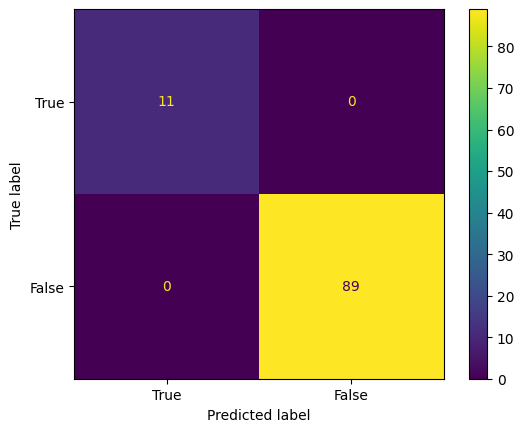

In [20]:
input_table = create_table(con, input_dir)
predicted_table = test_rule(con, sql_str, target_predicate="Target")
performance_metrics(predicted_table["Target"],input_table["Target"], labels=[True,False])

### a-b-c-d rules, 1000 rows

In [21]:
%%time 
input_dir = '../examples/a-b-c-d-1000/'
target, p_e, constants, B, P, N = process_dir(input_dir)

langage_frame = Language_Frame(target, p_e, constants)
program_template = Program_Template(p_a, rules, T=10)
print("DILP initialisation")
dilp = DILP(langage_frame, B, P, N, program_template)
dilp.show_definition()

3896
end of facts processing
118
end of positive examples processing
1744
end negative examples processing
data is in order
DILP initialisation
----------------------------
Target(X_0)
Target(X_0) -> D(X_0),pred2(X_0)
None
----------------------------
----------------------------
pred1(X_0)
pred1(X_0) -> pred2(X_0),C(X_0)
None
----------------------------
----------------------------
pred2(X_0)
pred2(X_0) -> A(X_0),C(X_0)
None
----------------------------
CPU times: user 10.8 s, sys: 31.7 ms, total: 10.8 s
Wall time: 10.4 s


[(Target(X_0) -> D(X_0),pred2(X_0), None),
 (pred1(X_0) -> pred2(X_0),C(X_0), None),
 (pred2(X_0) -> A(X_0),C(X_0), None)]

In [22]:
start_time = time.time()
dilp.train()
finish_time = time.time()
print("execution time %d" % (finish_time - start_time))

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 0 loss is 3.9312355518341064
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Target(276) Expected: 0 0.938
Target(78) Expected: 0 0.352
Target(719) Expected: 0 0.428
Target(310) Expected: 0 1.000
Target(34) Expected: 0 0.965
Target(704) Expected: 0 0.973
Target(90) Expected: 0 0.938
Target(869) Expected: 0 0.973
Target(535) Expected: 0 0.333
Target(762) Expected: 0 1.000
Target(35) Expected: 0 0.291
Target(632) Expected: 0 1.000
Target(532) Expected: 0 0.904
Target(394) Expected: 0 0.352
Target(157) Expected: 0 0.904
Target(327) Expected: 0 0.981
Target(419) Expected: 0 1.000
Target(883) Expected: 0 0.333
Target(244) Expected: 0 1.000
Target(290) Expected: 

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 1 loss is 3.9123265743255615
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 2 loss is 3.8929264545440674
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 3 loss is 3.8718206882476807
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 6 loss is 3.802079677581787
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 7 loss is 3.775998592376709
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 8 loss is 3.748892307281494
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 11 loss is 3.658256769180298
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 12 loss is 3.625300168991089
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 13 loss is 3.5910580158233643
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 16 loss is 3.4784343242645264
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 17 loss is 3.4380393028259277
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 18 loss is 3.396446466445923
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 21 loss is 3.2642810344696045
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 22 loss is 3.2178683280944824
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 23 loss is 3.170686960220337
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 26 loss is 3.0235626697540283
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 27 loss is 2.9729928970336914
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 28 loss is 2.9215452671051025
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 31 loss is 2.762512683868408
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 32 loss is 2.7078068256378174
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 33 loss is 2.6522209644317627
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 36 loss is 2.4798173904418945
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 37 loss is 2.4205856323242188
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 38 loss is 2.3606088161468506
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 41 loss is 2.1777727603912354
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 42 loss is 2.116706132888794
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 43 loss is 2.055941581726074
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 46 loss is 1.8791509866714478
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 47 loss is 1.822894811630249
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 48 loss is 1.768340826034546
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 51 loss is 1.6165882349014282
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 52 loss is 1.5703047513961792
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 53 loss is 1.526192545890808
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 56 loss is 1.406836986541748
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 57 loss is 1.3712351322174072
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 58 loss is 1.3375810384750366
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████████████████████

Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 61 loss is 1.2475337982177734
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 62 loss is 1.220885157585144
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 63 loss is 1.1957178115844727
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 66 loss is 1.12852144241333
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 67 loss is 1.108614444732666
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 68 loss is 1.0898189544677734
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 71 loss is 1.0394575595855713
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 72 loss is 1.0244783163070679
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 73 loss is 1.0103070735931396
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 76 loss is 0.972173273563385
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 77 loss is 0.9607751965522766
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 78 loss is 0.9499559998512268
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 81 loss is 0.920698881149292
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 82 loss is 0.9118942618370056
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 83 loss is 0.903523325920105
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 86 loss is 0.8807401061058044
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 87 loss is 0.8738466501235962
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 88 loss is 0.8672695159912109
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 91 loss is 0.8492358326911926
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 92 loss is 0.8437427878379822
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 93 loss is 0.838482677936554
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 96 loss is 0.8239451050758362
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 97 loss is 0.8194694519042969
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 98 loss is 0.8151675462722778
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 101 loss is 0.8031529784202576
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 102 loss is 0.7994022369384766
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 103 loss is 0.7957643866539001
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 106 loss is 0.7853935956954956
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 107 loss is 0.7820701003074646
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 108 loss is 0.7787848711013794
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 111 loss is 0.7689211964607239
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 112 loss is 0.7655136585235596
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 113 loss is 0.7619603872299194
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 116 loss is 0.7493539452552795
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 117 loss is 0.7439676523208618
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 118 loss is 0.7376176118850708
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 121 loss is 0.7093952298164368
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 122 loss is 0.6953862905502319
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 123 loss is 0.6781023144721985
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 126 loss is 0.6014581918716431
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 127 loss is 0.5672746896743774
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 128 loss is 0.5297378301620483
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 131 loss is 0.4109748303890228
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 132 loss is 0.37411031126976013
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 133 loss is 0.3402661085128784
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 136 loss is 0.2585766911506653
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 137 loss is 0.2373022586107254
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 138 loss is 0.21845673024654388
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 141 loss is 0.17341072857379913
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 142 loss is 0.1613854318857193
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 143 loss is 0.1505257487297058
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 146 loss is 0.12353427708148956
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 147 loss is 0.1160350814461708
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 148 loss is 0.10914266854524612
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 151 loss is 0.09148236364126205
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 152 loss is 0.08643439412117004
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 153 loss is 0.08173856139183044
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 156 loss is 0.06945450603961945
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 157 loss is 0.0658755823969841
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 158 loss is 0.06251898407936096
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 161 loss is 0.0536130852997303
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 162 loss is 0.05098426714539528
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 163 loss is 0.048504773527383804
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 166 loss is 0.041860856115818024
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 167 loss is 0.03988175094127655
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 168 loss is 0.03800756856799126
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 171 loss is 0.03295024856925011
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 172 loss is 0.03143389895558357
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 173 loss is 0.02999381721019745
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 176 loss is 0.026088139042258263
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 177 loss is 0.024911513552069664
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 178 loss is 0.023791762068867683
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 181 loss is 0.02074350230395794
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 182 loss is 0.019821999594569206
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 183 loss is 0.018943680450320244
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 186 loss is 0.01654607057571411
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 187 loss is 0.015819385647773743
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 188 loss is 0.015125961042940617
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 191 loss is 0.0132291866466403
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 192 loss is 0.012653199024498463
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 193 loss is 0.012103090062737465
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 196 loss is 0.010596029460430145
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 197 loss is 0.010137716308236122
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 198 loss is 0.009699738584458828
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 201 loss is 0.008498434908688068
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 202 loss is 0.008132701739668846
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 203 loss is 0.007783025037497282
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 206 loss is 0.006823088973760605
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 207 loss is 0.006530601531267166
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 208 loss is 0.006250845734030008
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 211 loss is 0.00548236770555377
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 212 loss is 0.0052480739541351795
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 213 loss is 0.00502391392365098
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 216 loss is 0.004407830070704222
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 217 loss is 0.0042199199087917805
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 218 loss is 0.00404009222984314
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 221 loss is 0.003545680781826377
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 222 loss is 0.0033948190975934267
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 223 loss is 0.003250438952818513
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 226 loss is 0.0028533560689538717
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 227 loss is 0.0027321595698595047
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 228 loss is 0.0026161582209169865
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 231 loss is 0.0022970715072005987
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 232 loss is 0.002199657494202256
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 233 loss is 0.0021064113825559616
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 236 loss is 0.001849886029958725
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 237 loss is 0.0017715730937197804
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 238 loss is 0.0016965934773907065
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 241 loss is 0.0014902985421940684
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 242 loss is 0.0014273051638156176
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 243 loss is 0.00136701506562531
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 246 loss is 0.001201078062877059
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 247 loss is 0.0011504193535074592
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 248 loss is 0.001101909438148141
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 251 loss is 0.0009684285032562912
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 252 loss is 0.0009276684722863138
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 253 loss is 0.0008886412251740694
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 256 loss is 0.0007812554249539971
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 257 loss is 0.0007484563975594938
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 258 loss is 0.0007170538883656263
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 261 loss is 0.0006306319846771657
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 262 loss is 0.0006042436580173671
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 263 loss is 0.0005789604620076716
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 266 loss is 0.0005094135995022953
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 267 loss is 0.00048817158676683903
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 268 loss is 0.00046782498247921467
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 271 loss is 0.00041183881694450974
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 272 loss is 0.00039473024662584066
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 273 loss is 0.0003783511056099087
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 276 loss is 0.0003332639462314546
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 277 loss is 0.0003194871242158115
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 278 loss is 0.00030629755929112434
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 281 loss is 0.00026996692758984864
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 282 loss is 0.00025886643561534584
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 283 loss is 0.00024823303101584315
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 286 loss is 0.00021894862584304065
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 287 loss is 0.00021000216656830162
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 288 loss is 0.00020143190340604633
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 291 loss is 0.00017782521899789572
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 292 loss is 0.00017060857499018312
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 293 loss is 0.00016369220975320786
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 296 loss is 0.00014465120329987258
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 297 loss is 0.00013882464554626495
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 298 loss is 0.00013324555766303092
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 301 loss is 0.00011788123083533719
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 302 loss is 0.00011318404722260311
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 303 loss is 0.0001086823976947926
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 306 loss is 9.628545376472175e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 307 loss is 9.249353024642915e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 308 loss is 8.886138675734401e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 311 loss is 7.88604374974966e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 312 loss is 7.579854718642309e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 313 loss is 7.286762411240488e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 316 loss is 6.479980947915465e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 317 loss is 6.233114254428074e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 318 loss is 5.996961772325449e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 321 loss is 5.3459181799553335e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 322 loss is 5.14681451022625e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 323 loss is 4.955739859724417e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 326 loss is 4.430454282555729e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 327 loss is 4.270001227268949e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 328 loss is 4.1162562411045656e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 331 loss is 3.692891914397478e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 332 loss is 3.5627002944238484e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 333 loss is 3.438075873418711e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 336 loss is 3.096719228778966e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 337 loss is 2.9923470719950274e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 338 loss is 2.892304655688349e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 341 loss is 2.615547964524012e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 342 loss is 2.5311197532573715e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 343 loss is 2.450552892696578e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 346 loss is 2.2275089577306062e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 347 loss is 2.1586298316833563e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 348 loss is 2.094419141940307e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 351 loss is 1.9127772247884423e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 352 loss is 1.8573973648017272e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 353 loss is 1.804412568162661e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 356 loss is 1.6581696399953216e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 357 loss is 1.613163658475969e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 358 loss is 1.5704759789514355e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 361 loss is 1.450922354706563e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 362 loss is 1.4138950064079836e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 363 loss is 1.379563309455989e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 366 loss is 1.2815438822144642e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 367 loss is 1.250894092663657e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 368 loss is 1.2218451956869103e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 371 loss is 1.1419973816373385e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 372 loss is 1.1180515684827697e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 373 loss is 1.0930173630185891e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 376 loss is 1.026391691993922e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 377 loss is 1.006396360025974e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 378 loss is 9.857544682745356e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 381 loss is 9.301996215071995e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 382 loss is 9.134185347647872e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 383 loss is 8.962725587480236e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 386 loss is 8.499055184074678e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 387 loss is 8.358966624655295e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 388 loss is 8.21503908809973e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 391 loss is 7.814884156687185e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 392 loss is 7.690483471378684e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 393 loss is 7.570180514449021e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 396 loss is 7.2296338657906745e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 397 loss is 7.121176167856902e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 398 loss is 7.020593784545781e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 401 loss is 6.7307555582374334e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 402 loss is 6.638047580054263e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 403 loss is 6.5493104557390325e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 406 loss is 6.294877493928652e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 407 loss is 6.217344434844563e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 408 loss is 6.133281203801744e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 411 loss is 5.910284926358145e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 412 loss is 5.836978289153194e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 413 loss is 5.767832135461504e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 416 loss is 5.572111149376724e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 417 loss is 5.514616987056797e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 418 loss is 5.4491215450980235e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 421 loss is 5.2729274102603085e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 422 loss is 5.215690634940984e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 423 loss is 5.158324711374007e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 426 loss is 5.001851150154835e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 427 loss is 4.951656592311338e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 428 loss is 4.89480316900881e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 431 loss is 4.75728074889048e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 432 loss is 4.715409431810258e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 433 loss is 4.665662800107384e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 436 loss is 4.539921064861119e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 437 loss is 4.501570856518811e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 438 loss is 4.456049737200374e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 441 loss is 4.338119197200285e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 442 loss is 4.30380259786034e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 443 loss is 4.265452389518032e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 446 loss is 4.1557159420335665e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 447 loss is 4.12498457080801e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 448 loss is 4.087275101483101e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 451 loss is 3.992072379332967e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 452 loss is 3.96198174712481e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 453 loss is 3.9312499211519025e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 456 loss is 3.8364964893844444e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 457 loss is 3.805764663411537e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 458 loss is 3.7756096844532294e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 461 loss is 3.7035838431620505e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 462 loss is 3.6695234939543298e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 463 loss is 3.639432634372497e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 466 loss is 3.559787955964566e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 467 loss is 3.5296970963827334e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 468 loss is 3.5031914649152895e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 471 loss is 3.4312292882532347e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 472 loss is 3.4124702779081417e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 473 loss is 3.389485982552287e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 476 loss is 3.318100652904832e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 477 loss is 3.2949876640486764e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 478 loss is 3.2762293358246097e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 481 loss is 3.2120140076585812e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 482 loss is 3.193127213307889e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 483 loss is 3.174368202962796e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 486 loss is 3.10637597067398e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 487 loss is 3.094531848546467e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 488 loss is 3.072251274716109e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 491 loss is 3.0191761197784217e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 492 loss is 3.0002897801750805e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 493 loss is 2.9815312245773384e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 496 loss is 2.9290963539096992e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 497 loss is 2.910145440182532e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 498 loss is 2.8947799819434294e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████

In [23]:
abcd_rules_1000 = dilp.show_definition()
sql_str = output_rules(abcd_rules_1000)

----------------------------
Target(X_0)
Target(X_0) -> pred1(X_0),B(X_0)
None
----------------------------
----------------------------
pred1(X_0)
pred1(X_0) -> D(X_0),pred2(X_0)
None
----------------------------
----------------------------
pred2(X_0)
pred2(X_0) -> A(X_0),C(X_0)
None
----------------------------
pred2 : A C
pred1 : D pred2
Target : pred1 B


previous table dropped
Accuracy: 1.000000
Precision TP/(TP+FP): 1.000000
Recall TP/(TP+FN): 1.000000
F1 Score: 1.000000
MCC Score: 1.000000


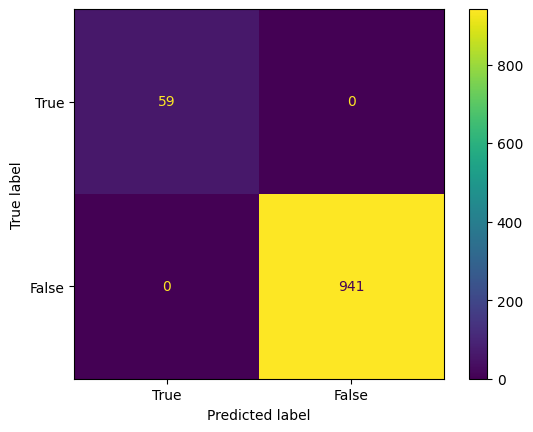

In [24]:
input_table = create_table(con, input_dir)
predicted_table = test_rule(con, sql_str, target_predicate="Target")
performance_metrics(predicted_table["Target"],input_table["Target"], labels=[True,False])

### a-b-c-d rules, 1000 rows first 20 are true

In [29]:
%%time 
input_dir = '../examples/a-b-c-d-first-20-true/'
target, p_e, constants, B, P, N = process_dir(input_dir)

langage_frame = Language_Frame(target, p_e, constants)
program_template = Program_Template(p_a, rules, T=10)
print("DILP initialisation")
dilp = DILP(langage_frame, B, P, N, program_template, allow_target_recursion=True)
dilp.show_definition()

488
end of facts processing
44
end of positive examples processing
148
end negative examples processing
data is in order
DILP initialisation
----------------------------
Target(X_0)
Target(X_0) -> pred1(X_0),C(X_0)
None
----------------------------
----------------------------
pred1(X_0)
pred1(X_0) -> pred2(X_0),Target(X_0)
None
----------------------------
----------------------------
pred2(X_0)
pred2(X_0) -> A(X_0),A(X_0)
None
----------------------------
CPU times: user 152 ms, sys: 2.06 ms, total: 154 ms
Wall time: 154 ms


[(Target(X_0) -> pred1(X_0),C(X_0), None),
 (pred1(X_0) -> pred2(X_0),Target(X_0), None),
 (pred2(X_0) -> A(X_0),A(X_0), None)]

In [30]:
start_time = time.time()
dilp.train()
finish_time = time.time()
print("execution time %d" % (finish_time - start_time))

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 0 loss is 4.147136688232422
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Target(78) Expected: 0 0.998
Target(34) Expected: 0 1.000
Target(90) Expected: 0 0.958
Target(35) Expected: 0 0.764
Target(29) Expected: 0 0.989
Target(67) Expected: 0 0.101
Target(25) Expected: 0 0.953
Target(45) Expected: 0 0.999
Target(84) Expected: 0 0.764
Target(76) Expected: 0 1.000
Target(99) Expected: 0 0.989
Target(17) Expected: 1 1.000
Target(43) Expected: 0 0.101
Target(23) Expected: 0 1.000
Target(57) Expected: 0 1.000
Target(6) Expected: 1 1.000
Target(49) Expected: 0 0.998
Target(2) Expected: 1 1.000
Target(24) Expected: 0 0.996
Target(61) Expected: 0 0.953
Target(96) 

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 6 loss is 3.9639034271240234
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 7 loss is 3.9287445545196533
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 8 loss is 3.8921403884887695
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████████████████████

Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 16 loss is 3.5514373779296875
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 17 loss is 3.5010154247283936
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 18 loss is 3.4492294788360596
--------------------

Performing Inference
Progress: |█████████████████████████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 26 loss is 2.962717056274414
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 27 loss is 2.8925857543945312
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 28 loss is 2.8208963871002197
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 36 loss is 2.2102701663970947
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 37 loss is 2.134514093399048
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 38 loss is 2.060105800628662
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 46 loss is 1.5291732549667358
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 47 loss is 1.471466064453125
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 48 loss is 1.415517807006836
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 56 loss is 1.0204194784164429
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 57 loss is 0.9764124751091003
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 58 loss is 0.9334196448326111
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 66 loss is 0.6254862546920776
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 67 loss is 0.5919238328933716
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 68 loss is 0.5596334338188171
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 76 loss is 0.35201385617256165
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 77 loss is 0.3325723111629486
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 78 loss is 0.3145188093185425
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 86 loss is 0.2139187604188919
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 87 loss is 0.20588721334934235
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 88 loss is 0.1986391544342041
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 96 loss is 0.16113094985485077
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 97 loss is 0.15814225375652313
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 98 loss is 0.15536938607692719
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 106 loss is 0.13711319863796234
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 107 loss is 0.1349945217370987
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 108 loss is 0.13287042081356049
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 116 loss is 0.11543365567922592
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 117 loss is 0.11321187019348145
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 118 loss is 0.11098750680685043
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 126 loss is 0.0931612029671669
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 127 loss is 0.09090110659599304
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 128 loss is 0.08861986547708511
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 136 loss is 0.06915628165006638
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 137 loss is 0.06657924503087997
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 138 loss is 0.0639902725815773
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 146 loss is 0.04421749711036682
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 147 loss is 0.04201608896255493
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 148 loss is 0.03989815339446068
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 156 loss is 0.0261070653796196
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 157 loss is 0.024758419021964073
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 158 loss is 0.023483842611312866
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 166 loss is 0.015535744838416576
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 167 loss is 0.014773937873542309
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 168 loss is 0.01405381876975298
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 176 loss is 0.009521069005131721
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 177 loss is 0.009079444222152233
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 178 loss is 0.008660304360091686
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 186 loss is 0.005977300461381674
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 187 loss is 0.005711086094379425
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 188 loss is 0.005457597319036722
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 196 loss is 0.00381309911608696
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 197 loss is 0.0036477793473750353
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 198 loss is 0.003489934140816331
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 206 loss is 0.0024570103269070387
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 207 loss is 0.002352289156988263
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 208 loss is 0.0022521435748785734
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 216 loss is 0.0015931319212540984
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 217 loss is 0.001525971689261496
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 218 loss is 0.0014617148553952575
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 226 loss is 0.0010373425902798772
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 227 loss is 0.0009939493611454964
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 228 loss is 0.0009524470078758895
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 236 loss is 0.0006777786766178906
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 237 loss is 0.0006496545975096524
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 238 loss is 0.000622727267909795
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 246 loss is 0.0004445631057024002
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 247 loss is 0.0004263796436134726
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 248 loss is 0.0004091199079994112
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 256 loss is 0.0002940726699307561
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 257 loss is 0.0002822212700266391
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 258 loss is 0.000270940043265
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 266 loss is 0.00019591413729358464
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 267 loss is 0.00018816253577824682
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 268 loss is 0.0001807632652344182
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 276 loss is 0.0001315542176598683
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 277 loss is 0.00012645662354771048
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 278 loss is 0.0001216389937326312
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 286 loss is 8.937818347476423e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 287 loss is 8.609172073192894e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 288 loss is 8.288562094094232e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 296 loss is 6.180221680551767e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 297 loss is 5.9630739997373894e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 298 loss is 5.75549784116447e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 306 loss is 4.366133362054825e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 307 loss is 4.223105497658253e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 308 loss is 4.089641515747644e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 316 loss is 3.1785999453859404e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 317 loss is 3.08079288515728e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 318 loss is 2.992610643559601e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 326 loss is 2.386467531323433e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 327 loss is 2.3247426724992692e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 328 loss is 2.2643847842118703e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 336 loss is 1.8585875295684673e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 337 loss is 1.8154314602725208e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 338 loss is 1.7733933418639936e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 346 loss is 1.4978187209635507e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 347 loss is 1.465778495912673e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 348 loss is 1.4390781871043146e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 356 loss is 1.2418085134413559e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 357 loss is 1.2203865480842069e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 358 loss is 1.1982815522060264e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 366 loss is 1.0585737072688062e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 367 loss is 1.0386424946773332e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 368 loss is 1.0270930943079293e-05
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 376 loss is 9.179359949484933e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 377 loss is 9.038412827067077e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 378 loss is 8.935340702009853e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 386 loss is 8.083449756668415e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 387 loss is 8.007697033463046e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 388 loss is 7.889725566201378e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 396 loss is 7.227835794765269e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 397 loss is 7.186234142864123e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 398 loss is 7.1154499892145395e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 406 loss is 6.564707291545346e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 407 loss is 6.477159331552684e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 408 loss is 6.420657427952392e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 416 loss is 5.966155640635407e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 417 loss is 5.926416633883491e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 418 loss is 5.848805358255049e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 426 loss is 5.475643320096424e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 427 loss is 5.430938017525477e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 428 loss is 5.407964636106044e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 436 loss is 5.0639860091905575e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 437 loss is 5.045978923590155e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 438 loss is 4.995065410184907e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 446 loss is 4.731183253170457e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 447 loss is 4.70138002128806e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 448 loss is 4.650466962630162e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |█████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 456 loss is 4.433772573975148e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 457 loss is 4.380376140034059e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 458 loss is 4.343743512436049e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 466 loss is 4.151264420215739e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 467 loss is 4.137604719289811e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 468 loss is 4.082965915586101e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 476 loss is 3.896697762684198e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 477 loss is 3.8873836274433415e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 478 loss is 3.863169240503339e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |███████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 486 loss is 3.7004945170338033e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 487 loss is 3.673175115181948e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 488 loss is 3.6626199744205223e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 496 loss is 3.52291863237042e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 497 loss is 3.4937365853693336e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
--------------------
step 498 loss is 3.446549271757249e-06
--------------------

Performing Inference
Progress: |██████████████████████████████████████████████████| 100.0% Complete
Inference Complete
Performing Inference
Progress: |████████

In [31]:
abcd_rules_1000_first_20 = dilp.show_definition()
sql_str = output_rules(abcd_rules_1000_first_20)

----------------------------
Target(X_0)
Target(X_0) -> pred1(X_0),C(X_0)
None
----------------------------
----------------------------
pred1(X_0)
pred1(X_0) -> pred2(X_0),Target(X_0)
None
----------------------------
----------------------------
pred2(X_0)
pred2(X_0) -> D(X_0),B(X_0)
None
----------------------------
pred2 : D B
pred1 : pred2 Target
Target : pred1 C


previous table dropped
Accuracy: 1.000000
Precision TP/(TP+FP): 1.000000
Recall TP/(TP+FN): 1.000000
F1 Score: 1.000000
MCC Score: 1.000000


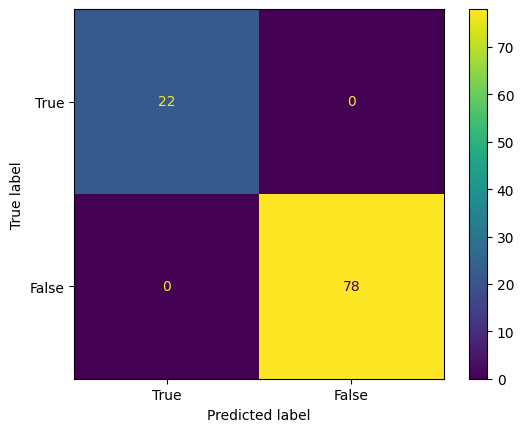

In [32]:
input_table = create_table(con, input_dir)
predicted_table = test_rule(con, sql_str, target_predicate="Target")
performance_metrics(predicted_table["Target"],input_table["Target"], labels=[True,False])